<a href="https://colab.research.google.com/github/HinaNitano/EU_M_Math/blob/main/Chap07_Hw_01_Ic_data_MatPlotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

In [ ]:
from google.colab import drive

# Googleドライブをマウント
drive.mount('/content/drive')

# ファイルパス
file_path_before_1 = '/content/drive/MyDrive/Ic_data/20240619_Ic_data1_Bi2223_curve_before.xlsx'
file_path_after_1 = '/content/drive/MyDrive/Ic_data/20240619_Ic_data4_Bi2223_curve_after110V.xlsx'

# ファイルを読み込み、DataFrameに変換
df_before_1 = pd.read_excel(file_path_before_1, sheet_name='before_1st')
df_after_1 = pd.read_excel(file_path_after_1, sheet_name='after110V_1st')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_before_1.head()

,No.,Time[s],CH1[V],CH2[V],CH3[V],CH4[V],CH5[V],CH6[V],CH7[V],CH8[V],CH9[V],Current [A],AB,AC,AD,EF,DE,GJ,FG,HI
0,29,43.015,0.000314,2.095815e-07,-1.536999e-08,-3.045819e-08,-1.086633e-06,2.645641e-06,-3.912035e-07,1.574379e-06,7.212089e-07,1.255963,0.104791,-0.003842,-0.007615,-0.108663,0.211651,-0.097801,0.125950,0.360604
1,30,44.510,0.000318,2.493593e-07,-8.532455e-08,-4.268667e-07,2.370144e-07,8.556309e-07,-7.297965e-08,-6.888528e-07,1.263012e-06,1.271007,0.124680,-0.021331,-0.106717,0.023701,0.068450,-0.018245,-0.055108,0.631506
2,31,46.014,0.000651,4.756824e-07,2.303621e-08,-1.964286e-07,-5.873503e-07,2.465954e-06,-3.075327e-07,5.524951e-07,4.002414e-07,2.602698,0.237841,0.005759,-0.049107,-0.058735,0.197276,-0.076883,0.044200,0.200121
3,32,47.498,0.000803,2.274126e-07,3.563482e-07,5.579814e-07,-2.142603e-07,2.105208e-06,2.461189e-09,1.106643e-06,8.419140e-07,3.210171,0.113706,0.089087,0.139495,-0.021426,0.168417,0.000615,0.088531,0.420957
4,33,48.991,0.001051,5.881578e-07,3.645781e-07,5.321242e-08,2.699339e-07,5.264334e-07,-3.706290e-07,-3.514258e-07,1.754939e-08,4.204719,0.294079,0.091145,0.013303,0.026993,0.042115,-0.092657,-0.028114,0.008775


In [ ]:
df_after_1.head()

,No.,Time[s],CH1[V],CH2[V],CH3[V],CH4[V],CH5[V],CH6[V],CH7[V],CH8[V],CH9[V],Current [A],AB,AC,AD,EF,DE,GJ,FG,HI
0,13,19.144,0.000791,-7.834921e-07,-1.895594e-07,8.065938e-08,-3.857081e-07,3.845914e-09,-6.188918e-07,1.643312e-07,1.876495e-07,3.165685,-0.391746,-0.047390,0.020165,-0.038571,0.000308,-0.154723,0.013146,0.093825
1,14,20.626,0.000998,-2.183644e-07,2.137113e-07,-8.356155e-07,-4.529198e-07,-5.653967e-07,-2.677445e-07,9.640141e-07,3.892849e-07,3.992159,-0.109182,0.053428,-0.208904,-0.045292,-0.045232,-0.066936,0.077121,0.194642
2,15,22.113,0.001330,-7.505719e-07,-1.758426e-07,-1.607543e-07,-4.611498e-07,2.946399e-07,-2.416827e-07,-4.872115e-07,2.329148e-07,5.321125,-0.375286,-0.043961,-0.040189,-0.046115,0.023571,-0.060421,-0.038977,0.116457
3,16,23.610,0.001681,-8.287571e-07,-7.190235e-07,-3.239829e-07,-3.061512e-07,6.800789e-07,-7.492003e-07,-2.689778e-10,2.891532e-07,6.723624,-0.414379,-0.179756,-0.080996,-0.030615,0.054406,-0.187300,-0.000022,0.144577
4,17,25.083,0.001955,-4.474329e-07,9.849155e-08,-2.361958e-07,2.864103e-07,4.619839e-07,-4.625212e-07,-1.196039e-07,1.006537e-06,7.821850,-0.223716,0.024623,-0.059049,0.028641,0.036959,-0.115630,-0.009568,0.503268


--- AB ---
m1: 0.06591180783166879 ± 0.025401140019589707
m2: 0.016925904738435835 ± 0.00026108312751916657
m3: 1.7522270089525158e-45 ± 1.6456991883175316e-44
m4: 19.478531438369085 ± 1.7611587359865633
--- AC ---
m1: 0.08896153771170968 ± 0.02096851497306607
m2: 0.008391788584841773 ± 0.0002276837853289892
m3: 2.8811352021078026e-35 ± 1.3825397219125024e-34
m4: 15.079228375942892 ± 0.899187599879408
--- AD ---
m1: -0.08035862320614394 ± 0.015896114123796077
m2: 0.009131371114673869 ± 0.00016088051217697405
m3: 1.6235465972650455e-49 ± 8.90902825836072e-49
m4: 21.26032669170498 ± 1.0325852289413304
--- EF ---
m1: 0.07230853919272937 ± 0.01683022448020425
m2: -0.0003456949610358168 ± 0.00018114882458634786
m3: 2.0863309319493763e-36 ± 5.8769605424866314e-36
m4: 15.640464692823002 ± 0.529537713216387
--- DE ---
m1: 0.10115086634433443 ± 0.013849594967582759
m2: -0.00027599668144788437 ± 0.00014538743612729454
m3: 6.489581020115361e-41 ± 2.8393879191012474e-40
m4: 17.502071360672726 ± 0.

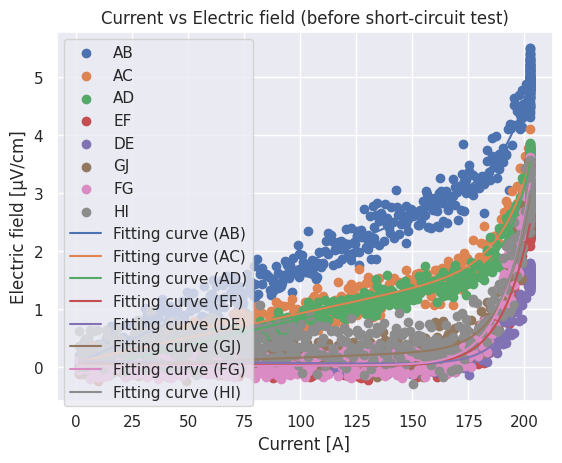

In [ ]:
# 散布図を作成
columns = ['AB', 'AC', 'AD', 'EF', 'DE', 'GJ', 'FG', 'HI']  # y軸にプロットする列
for col in columns:
    plt.scatter(df_before_1['Current [A]'], df_before_1[col], label=col)

# 軸ラベルを設定
plt.xlabel('Current [A]')
plt.ylabel('Electric field [µV/cm]')

# 凡例を表示
plt.legend()

# フィッティング
from scipy.optimize import curve_fit

columns = ['AB', 'AC', 'AD', 'EF', 'DE', 'GJ', 'FG', 'HI']

def func(x, m1, m2, m3, m4):
    return m1 + m2 * x + m3 * x ** m4

# 最小二乗法によるフィッティング
for col in columns:
    y = df_before_1[col].to_numpy()
    x = df_before_1['Current [A]'].to_numpy()

    # 初期値の設定
    p0 = [0.001, 0.001, 0.001, 1]  # 初期値を調整できます

    # フィッティングを実行
    popt, pcov = curve_fit(func, x, y, p0=p0, maxfev=2000000000)

    # フィッティング結果の表示
    print(f'--- {col} ---')
    for i, param in enumerate(popt):
        print(f'm{i+1}: {param} ± {np.sqrt(pcov[i, i])}')

    # フィッティング曲線のプロット
    x_fit = np.linspace(x.min(), x.max(), 100)
    y_fit = func(x_fit, *popt)
    plt.plot(x_fit, y_fit, label=f'Fitting curve ({col})')

# 凡例/軸ラベル/タイトルの設定
plt.legend()
plt.xlabel('Current [A]')
plt.ylabel('Electric field [µV/cm]')
plt.title('Current vs Electric field (before short-circuit test)')

# グラフを表示
plt.show(renderer="colab")

--- AB ---
m1: -0.4335540667343514 ± 0.06356222400898427
m2: 0.017230634800168974 ± 0.002126075104224008
m3: 3.0771951735817424e-11 ± 2.1463997608029377e-09
m4: 4.616755502675461 ± 14.359399724321426


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


--- AC ---
m1: nan ± inf
m2: nan ± inf
m3: nan ± inf
m4: nan ± inf
--- AD ---
m1: -0.18333179526001228 ± 0.03822521284444795
m2: 0.007171455259386832 ± 0.0017556829730054348
m3: 3.3854638346786053e-08 ± 5.914809764070384e-07
m4: 3.2610582034656375 ± 3.5025872921545775
--- EF ---
m1: -0.03690383384309208 ± 0.028647226082000085
m2: -0.0009400870149958691 ± 0.0008804286667395644
m3: 5.5272095811439115e-11 ± 6.677890553343138e-11
m4: 5.206657711545736 ± 0.2518494826675395
--- DE ---
m1: 0.025822969836494788 ± 0.06830953043464186
m2: 0.6843860697342548 ± 2237.42613514488
m3: -0.6877592496734783 ± 2237.40352194826
m4: 0.9990653911113329 ± 3.0788471114388334
--- GJ ---
m1: -0.10689798646556435 ± 0.026190464172760147
m2: 0.001703048219739617 ± 0.0005369367406198739
m3: 8.956358701523997e-28 ± 9.808672009294708e-27
m4: 13.175773922059536 ± 2.322984118766063
--- FG ---
m1: 0.013919521863216216 ± 0.022962751929825363
m2: -0.0010621894465489934 ± 0.0007264747008905826
m3: 9.286919765676555e-11 ± 1

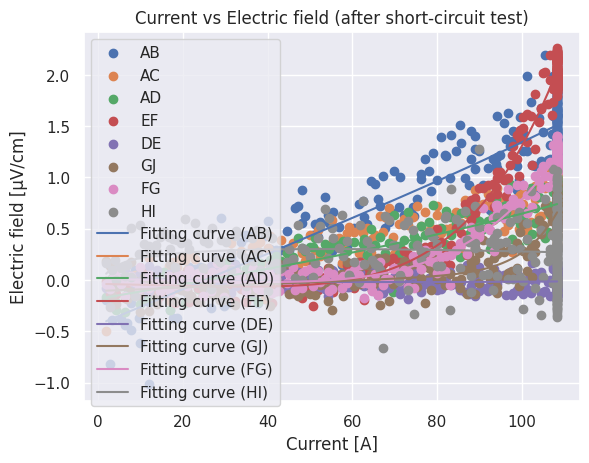

In [ ]:
# 散布図を作成
columns = ['AB', 'AC', 'AD', 'EF', 'DE', 'GJ', 'FG', 'HI']  # y軸にプロットする列
for col in columns:
    plt.scatter(df_after_1['Current [A]'], df_after_1[col], label=col)

# 軸ラベルを設定
plt.xlabel('Current [A]')
plt.ylabel('Electric field [µV/cm]')

# 凡例を表示
plt.legend()

# フィッティング
from scipy.optimize import curve_fit

columns = ['AB', 'AC', 'AD', 'EF', 'DE', 'GJ', 'FG', 'HI']

def func(x, m1, m2, m3, m4):
    return m1 + m2 * x + m3 * x ** m4

# 最小二乗法によるフィッティング
for col in columns:
    y = df_after_1[col].to_numpy()
    x = df_after_1['Current [A]'].to_numpy()

    # 初期値の設定
    p0 = [0.001, 0.001, 0.001, 1]  # 初期値を調整できます

    # フィッティングを実行
    popt, pcov = curve_fit(func, x, y, p0=p0, maxfev=2000000000)

    # フィッティング結果の表示
    print(f'--- {col} ---')
    for i, param in enumerate(popt):
        print(f'm{i+1}: {param} ± {np.sqrt(pcov[i, i])}')

    # フィッティング曲線のプロット
    x_fit = np.linspace(x.min(), x.max(), 100)
    y_fit = func(x_fit, *popt)
    plt.plot(x_fit, y_fit, label=f'Fitting curve ({col})')

# 凡例/軸ラベル/タイトルの設定
plt.legend()
plt.xlabel('Current [A]')
plt.ylabel('Electric field [µV/cm]')
plt.title('Current vs Electric field (after short-circuit test)')

# グラフを表示
plt.show()

In [ ]:
# プロットする列
columns = ['AB', 'AC', 'AD', 'EF', 'DE', 'GJ', 'FG', 'HI']

# フィッティング結果の取得
fitting_results = {}
for col in columns:
    y = df_before_1[col].to_numpy()
    x = df_before_1['Current [A]'].to_numpy()

    # 初期値の設定
    p0 = [0.001, 0.001, 0.001, 1]  # 初期値を調整できます

    # フィッティングを実行
    popt, _ = curve_fit(func, x, y, p0=p0, maxfev=2000000000)

    # フィッティング結果の保存
    fitting_results[col] = popt

print('Ic (before short-circuit test)')
print('-------------------------------')

# Icの計算
for col, popt in fitting_results.items():
    m3, m4 = popt[2:]
    Ic = (1 / m3)**(1 / m4)
    print(f'{col}: Ic = {Ic:.1f}')

Ic (before short-circuit test)
-------------------------------
AB: Ic = 198.5
AC: Ic = 195.3
AD: Ic = 197.2
EF: Ic = 191.1
DE: Ic = 197.8
GJ: Ic = 191.5
FG: Ic = 188.8
HI: Ic = 191.7


In [ ]:
# プロットする列
columns = ['AB', 'AC', 'AD', 'EF', 'DE', 'GJ', 'FG', 'HI']

# フィッティング結果の取得
fitting_results = {}
for col in columns:
    y = df_after_1[col].to_numpy()
    x = df_after_1['Current [A]'].to_numpy()

    # 初期値の設定
    p0 = [0.001, 0.001, 0.001, 1]  # 初期値を調整できます

    # フィッティングを実行
    popt, _ = curve_fit(func, x, y, p0=p0, maxfev=2000000000)

    # フィッティング結果の保存
    fitting_results[col] = popt

print('Ic (after short-circuit test)')
print('-------------------------------')

# Icの計算
for col, popt in fitting_results.items():
    m3, m4 = popt[2:]
    Ic = (1 / m3)**(1 / m4)
    print(f'{col}: Ic = {Ic:.1f}')

Ic (after short-circuit test)
-------------------------------
AB: Ic = 189.2
AC: Ic = nan
AD: Ic = 195.3
EF: Ic = 93.3
DE: Ic = nan
GJ: Ic = 112.9
FG: Ic = 102.7
HI: Ic = 0.0


<ipython-input-16-cde8fa6f51f5>:25: RuntimeWarning: invalid value encountered in scalar power
  Ic = (1 / m3)**(1 / m4)
